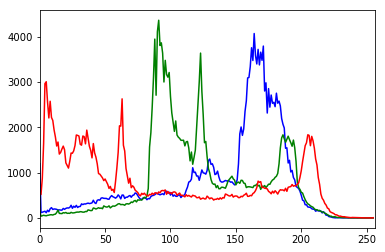

In [1]:
# Basic histogram example from:
# http://docs.opencv.org/trunk/d1/db7/tutorial_py_histogram_begins.html
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('home.jpg')
color = ('b','g','r')

for i,col in enumerate(color):
    # http://docs.opencv.org/3.1.0/d6/dc7/group__imgproc__hist.html#ga4b2b5fd75503ff9e6844cc4dcdaed35d
    #  [img] and [i] are used to specify the channel in the image.
    #  None for no mask, 256 bins, [0, 256] for the range.
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color=col)
    plt.xlim([0,256])

plt.show()

Shape= (384, 512)  [:2] (384, 512)


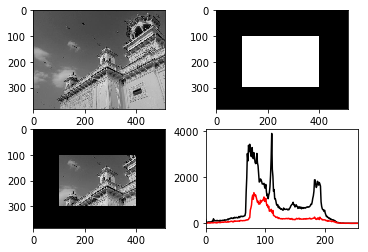

In [2]:
# Read image in grayscale
img = cv2.imread('home.jpg',0)

# create a mask
print("Shape=", img.shape, " [:2]", img.shape[:2])
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255

# http://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html
# mask specifies the elements that will change.
masked_img = cv2.bitwise_and(img, img, mask=mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

# Like Matlab subplot. 
#  221 is 2 rows, 2 columns, 1st image.
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full, color='black'), plt.plot(hist_mask, color='red')
plt.xlim([0,256])
plt.show()

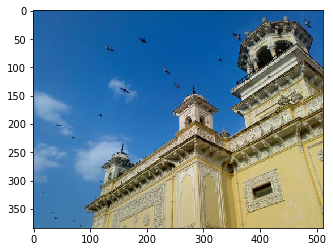

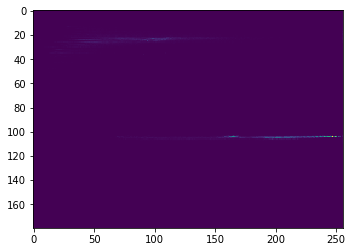

(<matplotlib.image.AxesImage at 0x194f42d5278>, None)

In [3]:
# 2D Histogram examples:
# http://docs.opencv.org/trunk/dd/d0d/tutorial_py_2d_histogram.html
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Array normalization for floating point numbers.
def norm_array(ar2d):
    # Make a new normalized array copy.
    # Do not normalize in place.
    norm_arr = ((ar2d-ar2d.min())/(ar2d.max()-ar2d.min())).copy()
    return(norm_arr)

# The following function applies normalization to each channel if needed.
def plt_color(img_bgr):
    b,g,r = cv2.split(img_bgr)
    norm1 = norm_array(b)
    norm2 = norm_array(g)
    norm3 = norm_array(r)
    img_norm = cv2.merge((norm1, norm2, norm3))
    plt.imshow(img_norm)
    plt.show()

# Read image in bgr
img = cv2.imread('home.jpg')

# Must convert the image to RGB for plt.imshow() to work
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert bgr to hsv
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

# 2D Histogram:
# Sample h and s by specifying [0, 1]
# 180 bins for H, 256 bins for S.
# [0, 180, 0, 256] give the vertical and then horizontal limits for the histogram
hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256] )

plt.imshow(img_rgb), plt.show()
plt.imshow(hist,interpolation = 'nearest'), plt.show()


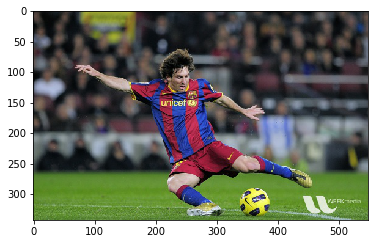

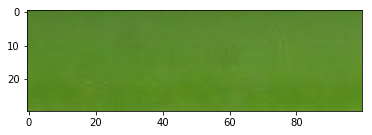

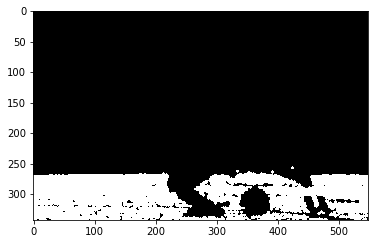

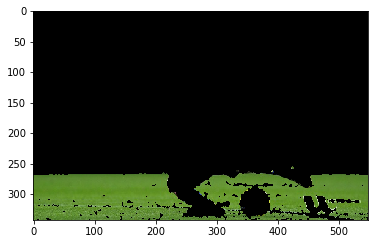

(<matplotlib.image.AxesImage at 0x194f45314e0>, None)

In [4]:
import cv2
import numpy as np

target = cv2.imread('messi5.jpg')
hsvt = cv2.cvtColor(target,cv2.COLOR_BGR2HSV)

hsv = hsvt[270:300,0:100]
roihist = cv2.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )

# normalize histogram and apply backprojection
cv2.normalize(roihist,roihist,0,255,cv2.NORM_MINMAX)
dst = cv2.calcBackProject([hsvt],[0,1],roihist,[0,180,0,256],1)

# Now convolute with circular disc
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
cv2.filter2D(dst,-1,disc,dst)

# threshold and binary AND
ret,thresh = cv2.threshold(dst,50,255,0)
thresh = cv2.merge((thresh,thresh,thresh))
res = cv2.bitwise_and(target,thresh)
#res = np.vstack((target,thresh,res))

#cv2.imwrite('res.jpg',res)

# Display input and output in OpenCV
inp  = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)
hsv2 = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
res2 = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
plt.imshow(inp), plt.show()
plt.imshow(hsv2), plt.show()
plt.imshow(thresh), plt.show()
plt.imshow(res2), plt.show()